# Project Statement:

Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. It is a major problem to an organization, and predicting turnover is at the forefront of the needs of Human Resources (HR) in many organizations. Organizations face huge costs resulting from employee turnover. With advances in machine learning and data science, it’s possible to predict the employee attrition, and we will predict using Random Forest Classifier algorithm. 


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import zscore
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data description

df is a dataset of IBM employee attrition data. Each row is personal and attrition information of an employee. Our project is focusing on using machine learning to predict attrition. We are also providing interesting findings that people usually don't think of regarding employee attrition.



Important columns in df are:

    Attrition: Whether employees are still with the company or whether they’ve gone to work somewhere else.
    Age: 18 to 60 years old
    Gender: Female or Male
    Department: Research & Development, Sales, Human Resources.
    BusinessTravel: Travel_Rarely, Travel_Frequently, Non-Travel.
    DistanceFromHome: Distance between the company and their home in miles.
    MonthlyIncome: Employees' numeric monthly income.
    MaritalStatus: Married, Single, Divorced.
    Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'.
    EducationField: Life Sciences， Medical， Marketing，Technical Degree，Other.
    EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
    RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
    JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
    JobRole: Sales Executive，Research Science, Laboratory Tec, Manufacturing, Healthcare Rep, etc
    JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
    OverTime: Whether they work overtime or not.
    NumCompaniesWorked: Number of companies they worked for before joinging IBM.
    PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'.
    YearsAtCompany: Years they worked for IBM.
    WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'.
    YearsSinceLastPromotion: Years passed since their last promotion.



In [4]:
import pandas as pd
df=pd.read_csv("E:\data trained\ibm-hr-analytics-employee-attrition-performance.zip")

In [5]:
pd.options.display.max_columns = None

In [6]:


df.shape



(1470, 35)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# 2. Data Preparation

In [8]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

From the above we can tell there is no missing value in the dataset.

# Check duplicate rows

In [11]:
df[df.duplicated(keep='first')].shape

(0, 35)

# Check column types

In [13]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [14]:
temp = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        temp.append(col)
        df.drop(col,inplace=True,axis=1)

In [15]:


df.shape



(1470, 32)

In [16]:


temp



['EmployeeCount', 'Over18', 'StandardHours']

'EmployeeCount', 'Over18' and 'StandardHours' columns are deleted

It is also noticed that employee number doesn't have much meaning for the analysis so we are dropping this column as well.


In [17]:
df.drop(['EmployeeNumber'], axis = 1, inplace = True)

<AxesSubplot:>

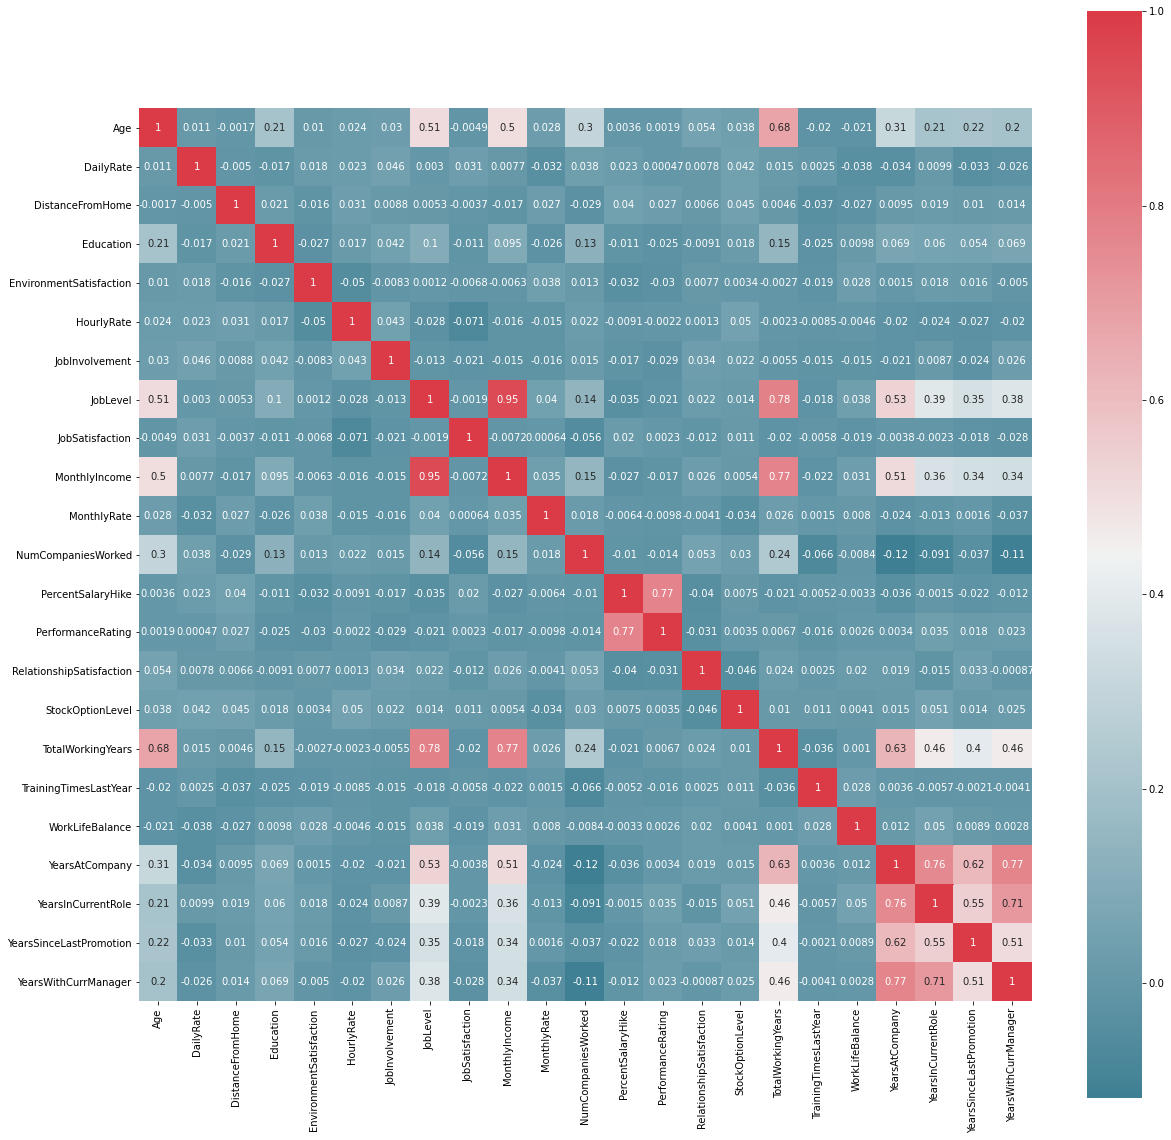

In [18]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

From the correlation table we see that monthly income is highly correlated with job level. However, daily rate, hourly rate and monthly rate are barely correlated with anything. We will be using monthly income in later analysis as a measurement of salary and get rid of other income related variables.

# Binarize Gender, OverTime and Attrition

In [20]:
df['Male'] = df.Gender == 'Male'
df.drop('Gender', axis = 1,inplace=True)
df['OverTime'] = df.OverTime == 'Yes'
df['Attrition'] = df.Attrition == 'Yes'


3. Exploratory Data Visualization

<AxesSubplot:xlabel='Attrition', ylabel='count'>

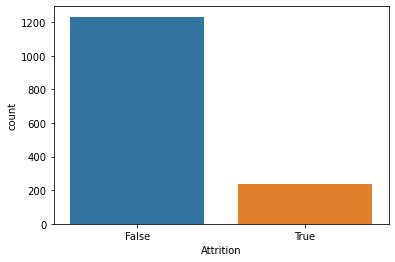

In [21]:
sns.countplot(x='Attrition', data=df)

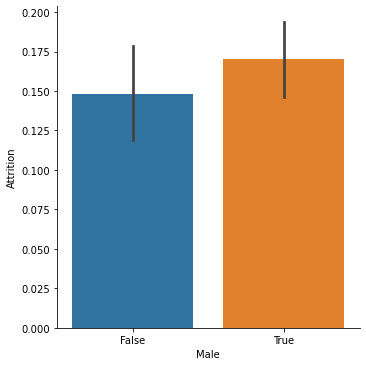

In [22]:
sns.factorplot(x = 'Male', y='Attrition', kind = 'bar', data=df)

Male is generally more likely to quit than female.

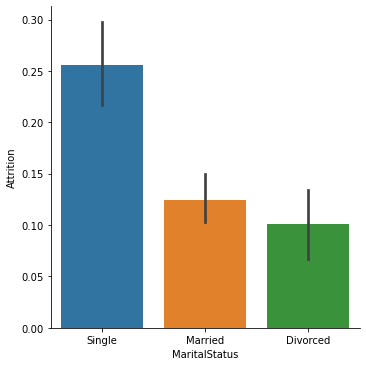

In [23]:
sns.factorplot(x = 'MaritalStatus', y='Attrition', kind = 'bar', data=df)

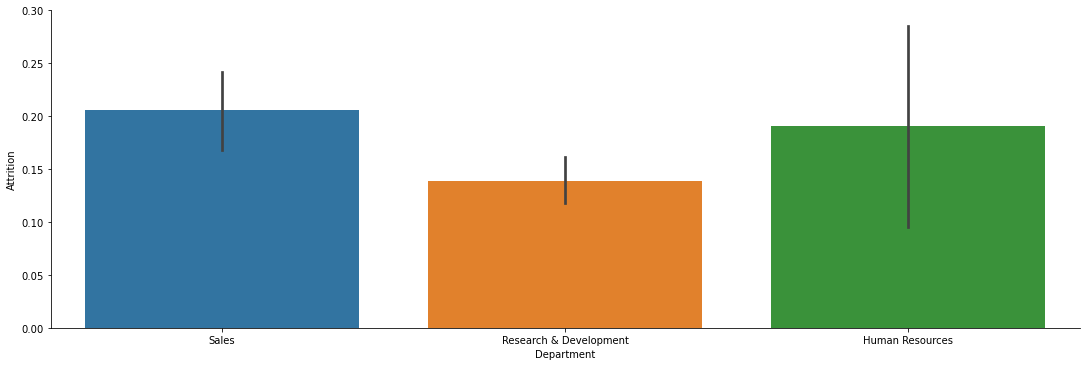

In [24]:
sns.factorplot(x = 'Department', y='Attrition', kind = 'bar', data=df, aspect = 3)

Sales department and Human resources department are having higher attrition rate compared to research and development department.

# Machine Learning

In [25]:
df1 = pd.get_dummies(df, columns=['BusinessTravel','Department',
                        'EducationField','JobRole','MaritalStatus'])

In [26]:
df1.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Male,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,True,1102,1,2,2,94,3,2,4,5993,19479,8,True,11,3,1,0,8,0,1,6,4,0,5,False,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,False,279,8,1,3,61,2,2,2,5130,24907,1,False,23,4,4,1,10,3,3,10,7,1,7,True,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,True,1373,2,2,4,92,2,1,3,2090,2396,6,True,15,3,2,0,7,3,3,0,0,0,0,True,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,False,1392,3,4,4,56,3,1,3,2909,23159,1,True,11,3,3,0,8,3,3,8,7,3,0,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,False,591,2,1,1,40,3,1,2,3468,16632,9,False,12,3,4,1,6,3,3,2,2,2,2,True,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [27]:
X = df1.drop('Attrition',axis=1)

In [28]:
Y = df1.Attrition

In [29]:
# train a decision tree to predict attrition
dt = tree.DecisionTreeClassifier(max_depth=2)

In [30]:


# build the tree
dt.fit(X,Y)



DecisionTreeClassifier(max_depth=2)

In [31]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

TypeError: can only concatenate str (not "numpy.bytes_") to str

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

In [33]:
nfolds = 10
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier() 0.5993831358783636
RandomForestClassifier(n_jobs=-1) 0.8016420162533449
GaussianNB() 0.7717702067648513
LogisticRegression(n_jobs=-1) 0.7157427853123955
DecisionTreeClassifier() 0.6049579730314989
AdaBoostClassifier() 0.8368973718760575
QuadraticDiscriminantAnalysis() 0.7371399317413225
MLPClassifier() 0.6284141965339688
SVC() 0.5090566585279209
***********************************************
Best is... AdaBoostClassifier() 0.8368973718760575


# Feature Selection and Logistics Regression

In [36]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [37]:
df3 = df.copy()

Create dummies and interaction terms

In [40]:
df3.loc[df3['BusinessTravel'] == 'Non-Travel', 'b_travel'] = 0
df3.loc[df3['BusinessTravel'] == 'Travel_Rarely', 'b_travel'] = .5
df3.loc[df3['BusinessTravel'] == 'Travel_Frequently', 'b_travel'] = 1

In [41]:
df3 = pd.get_dummies(df3, columns=['MaritalStatus','EducationField', 'Department'])

In [42]:
df3.loc[(df3['Age'] <40)|(df3['Age'] >50), 'age40_50'] = 0
df3.loc[(df3['Age']>=40) &(df3['Age']<=50), 'age40_50'] = 1
df3.loc[df3['Male'] == 0, 'female'] = 1
df3.loc[df3['Male'] == 1, 'female'] = 0
df3.loc[df3['Education'] == 5, 'doc'] = 1
df3.loc[df3['Education'] != 5, 'doc'] = 0
df3.loc[df3['JobLevel'] == 3, 'joblevel3'] = 1
df3.loc[df3['JobLevel'] != 3, 'joblevel3'] = 0

In [43]:
df3['joblevel_hr'] = df3['Department_Human Resources'] * df3.JobLevel
df3['joblevel_rd'] = df3['Department_Research & Development'] * df3.JobLevel
df3['age40_50_female_div'] = df3.female * df3.age40_50 * df3.MaritalStatus_Divorced
df3['doc_job3'] = df3.doc * df3.joblevel3
df3 = df3.drop(['female','doc','age40_50','joblevel3'],axis=1)
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Male,b_travel,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,joblevel_hr,joblevel_rd,age40_50_female_div,doc_job3
0,41,True,Travel_Rarely,1102,1,2,2,94,3,2,Sales Executive,4,5993,19479,8,True,11,3,1,0,8,0,1,6,4,0,5,False,0.5,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0
1,49,False,Travel_Frequently,279,8,1,3,61,2,2,Research Scientist,2,5130,24907,1,False,23,4,4,1,10,3,3,10,7,1,7,True,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,2,0.0,0.0
2,37,True,Travel_Rarely,1373,2,2,4,92,2,1,Laboratory Technician,3,2090,2396,6,True,15,3,2,0,7,3,3,0,0,0,0,True,0.5,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0.0,0.0
3,33,False,Travel_Frequently,1392,3,4,4,56,3,1,Research Scientist,3,2909,23159,1,True,11,3,3,0,8,3,3,8,7,3,0,False,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0.0,0.0
4,27,False,Travel_Rarely,591,2,1,1,40,3,1,Laboratory Technician,2,3468,16632,9,False,12,3,4,1,6,3,3,2,2,2,2,True,0.5,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0.0,0.0


In [44]:
df3.dtypes

Age                                    int64
Attrition                               bool
BusinessTravel                        object
DailyRate                              int64
DistanceFromHome                       int64
Education                              int64
EnvironmentSatisfaction                int64
HourlyRate                             int64
JobInvolvement                         int64
JobLevel                               int64
JobRole                               object
JobSatisfaction                        int64
MonthlyIncome                          int64
MonthlyRate                            int64
NumCompaniesWorked                     int64
OverTime                                bool
PercentSalaryHike                      int64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                      int64
TrainingTimesLastYear                  int64
WorkLifeBa

In [45]:
df3=df3.drop(['BusinessTravel','JobRole'],axis=1)

In [46]:
df3['Attrition'] = df3['Attrition'].astype('int')
df3['Male'] = df3['Male'].astype('int')
df3['OverTime'] = df3['OverTime'].astype('int')

In [47]:
df3.dtypes

Age                                    int64
Attrition                              int32
DailyRate                              int64
DistanceFromHome                       int64
Education                              int64
EnvironmentSatisfaction                int64
HourlyRate                             int64
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyIncome                          int64
MonthlyRate                            int64
NumCompaniesWorked                     int64
OverTime                               int32
PercentSalaryHike                      int64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                      int64
TrainingTimesLastYear                  int64
WorkLifeBalance                        int64
YearsAtCompany                         int64
YearsInCur

# RandomForest Feature Importance

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(df3[X], df3[Y])
importances = pd.DataFrame({'feature':X,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print ('importances')
importances.plot.bar()

ValueError: Boolean array expected for the condition, not int64

In [39]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 30)
rfe = rfe.fit(df3[X], df3[Y] )
print(rfe.support_)
featureRFE_ranking = pd.DataFrame({'Features':X, 'rfe_ranking':rfe.ranking_}).sort_values(by = 'rfe_ranking')
print(featureRFE_ranking)

ValueError: Boolean array expected for the condition, not int64

In [54]:


from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 30)
rfe = rfe.fit(df3[X], df3[Y] )
print(rfe.support_)
featureRFE_ranking = pd.DataFrame({'Features':X, 'rfe_ranking':rfe.ranking_}).sort_values(by = 'rfe_ranking')
print(featureRFE_ranking)



ValueError: Boolean array expected for the condition, not int64

In [53]:


X_columns = np.array(X)[np.array(rfe.support_)]
X_columns



AttributeError: 'RFE' object has no attribute 'support_'

In [55]:


X = df3[X_columns]
Y = df3[Y]



NameError: name 'X_columns' is not defined

In [56]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred)
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural attrition')
plt.ylabel('Predicted Attrition');

NameError: name 'Y_test' is not defined